In [11]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


In [3]:
# Read the dataset and understand the features and target variable.
data=pd.read_csv('Qualitative_Bankruptcy.data.txt',names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])

In [6]:
data.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


Caanot proceed with the label Encoding because they are encoded alphabeltically and this will effect in dimensionality reductions

In [7]:
X=data.drop('Class',axis=1)
Y=data['Class']

In [8]:
# Encoding the independent features. 
label={'P':0,'A':1,'N':2}
for cols in X.columns:
    X[cols]=X[cols].map(label)

In [9]:
X.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,0,0,1,1,1,0
1,2,2,1,1,1,2
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,2,2,0,0,0,2


In [10]:
# according to the 3 and 4
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=7)

# Apply PCA

In [12]:
#Apply PCA on the independent features of training data

pca=PCA(n_components=6)
newData=pca.fit_transform(X_train)
eigenvalues=pca.explained_variance_
var_explained=pca.explained_variance_ratio_*100
cum_var_explained=np.cumsum(var_explained)


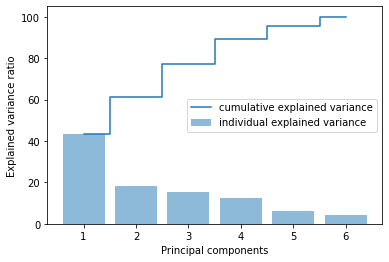

In [13]:
plt.bar(range(1,eigenvalues.size+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,eigenvalues.size+1),cum_var_explained, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

So From Above transformation we can remove the 6th Dimension 

In [14]:
newData_data=pd.DataFrame(newData[:,0:5],columns=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness'])


In [15]:
newData_data.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness
0,-1.223126,0.304928,0.956338,0.269503,0.308470
1,-0.405467,1.404534,0.148489,-0.168602,-0.123973
2,1.876272,0.663396,-1.105121,-0.717300,0.235651
3,0.669998,1.850374,0.358301,-0.216804,0.591803
4,-1.743723,0.120150,-0.480130,-0.478199,0.106607
5,-1.181123,-0.898487,0.988300,0.864807,-0.612481
6,1.390247,-0.822452,0.456104,1.044413,0.130016
7,1.402776,0.392771,-1.043790,-0.534472,0.945189
8,1.131928,0.585584,1.788408,-0.178007,0.229781
9,-1.954426,0.688069,0.000008,0.062427,-0.130211


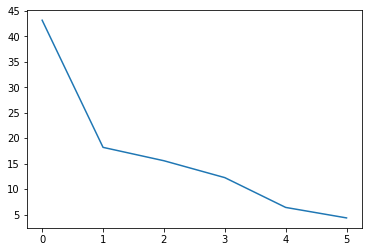

In [16]:
#6.	Display elbow plot to find out reduced number of dimensions 
plt.plot(var_explained)

# Again Applying PCA for previously transformed Data

In [18]:

pca=PCA(n_components=5)
newData1=pca.fit_transform(newData_data)
eigenvalues_new=pca.explained_variance_
var_explained_new=pca.explained_variance_ratio_*100
cum_var_explained_new=np.cumsum(var_explained_new)

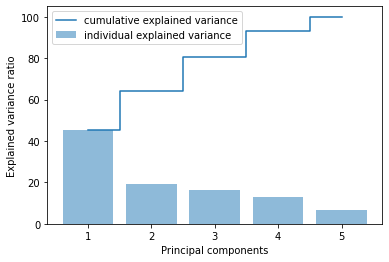

In [19]:
plt.bar(range(1,eigenvalues_new.size+1), var_explained_new, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,eigenvalues_new.size+1),cum_var_explained_new, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [20]:
new_data=pd.DataFrame(newData1,columns=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness'])


Now Consodering 5 PCs after overall transformation

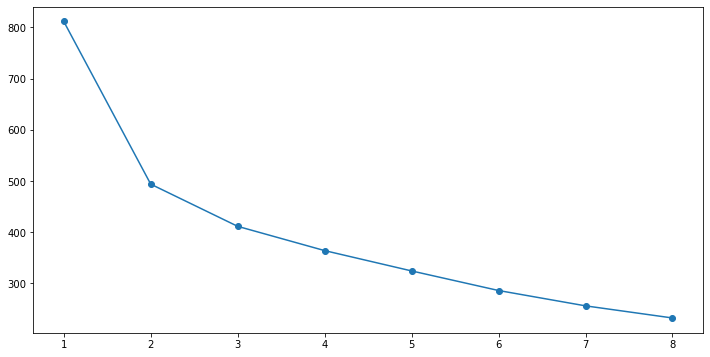

In [22]:
# according to 8 and 9
#Applying KMeans Clustering Algorithm.
#First Applying Elbow Technique to decide number of clusters
cluster_range = range( 1,9)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(new_data)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [23]:

#Apply KMeans CLustering by taking 4 clusters
cluster_ = KMeans( n_clusters = 4, random_state = 1 )
cluster_.fit(new_data)

KMeans(n_clusters=4, random_state=1)

In [24]:
cluster_.labels_

array([2, 0, 0, 0, 1, 2, 3, 0, 0, 1, 3, 2, 0, 0, 3, 0, 3, 0, 1, 2, 0, 0,
       0, 2, 3, 1, 3, 1, 3, 0, 2, 3, 0, 0, 0, 0, 1, 0, 3, 0, 1, 3, 2, 3,
       1, 0, 2, 1, 2, 3, 3, 1, 2, 2, 1, 0, 2, 1, 1, 0, 3, 1, 2, 3, 1, 0,
       0, 1, 0, 1, 0, 3, 1, 3, 1, 1, 3, 1, 2, 0, 0, 1, 1, 1, 3, 3, 0, 3,
       0, 3, 1, 0, 0, 1, 3, 1, 0, 2, 0, 0, 0, 1, 2, 1, 3, 2, 3, 1, 0, 0,
       0, 1, 3, 0, 1, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 1, 2, 0, 1, 2, 0, 2,
       1, 2, 2, 3, 0, 3, 1, 3, 2, 1, 3, 2, 3, 1, 1, 0, 1, 3, 1, 1, 2, 0,
       0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 3, 0, 1, 0, 1, 0, 3, 3, 0, 3, 1,
       0, 0, 1, 0, 1, 2, 3, 2, 0, 0, 0, 3, 0, 0, 2, 0, 3, 2, 1, 0, 1, 3,
       1, 1])

In [26]:
# 10th ques
#Creating the new Cluster Column in the Train Data Set
new_data['Cluster']=cluster_.labels_
new_data.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Cluster
0,-1.223126,0.304928,0.956338,0.269503,0.308470,2
1,-0.405467,1.404534,0.148489,-0.168602,-0.123973,0
2,1.876272,0.663396,-1.105121,-0.717300,0.235651,0
3,0.669998,1.850374,0.358301,-0.216804,0.591803,0
4,-1.743723,0.120150,-0.480130,-0.478199,0.106607,1
5,-1.181123,-0.898487,0.988300,0.864807,-0.612481,2
6,1.390247,-0.822452,0.456104,1.044413,0.130016,3
7,1.402776,0.392771,-1.043790,-0.534472,0.945189,0
8,1.131928,0.585584,1.788408,-0.178007,0.229781,0
9,-1.954426,0.688069,0.000008,0.062427,-0.130211,1


In [28]:
# 11 th ques
pca=PCA(n_components=6)
newTestData=pca.fit_transform(X_test)
eigenvalues_test=pca.explained_variance_
var_explained_test=pca.explained_variance_ratio_*100
cum_var_explained_test=np.cumsum(var_explained_test)

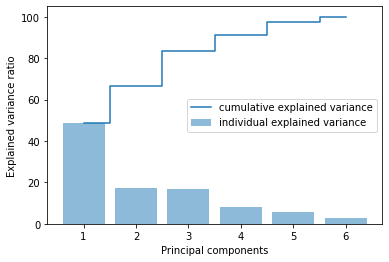

In [29]:
plt.bar(range(1,eigenvalues_test.size+1), var_explained_test, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,eigenvalues_test.size+1),cum_var_explained_test, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

As in the training data selecting the same 5 variables as there is around 95% Contributon from Firdt 5 PCs

In [32]:
data2=pd.DataFrame(newTestData[:,0:5],columns=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness'])


In [33]:
data2.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness
0,-1.322622,1.457172,0.183590,0.501648,-0.209040
1,-1.731397,0.089877,-0.496128,-0.355382,0.642819
2,0.204940,-1.655524,0.505838,-0.947957,-0.007803
3,0.899651,0.787151,-0.919904,-0.627663,0.061843
4,2.400747,-0.316567,-0.448018,-0.254252,-0.154793
5,-0.494158,0.253394,1.824682,-0.571488,-0.319074
6,0.788081,-1.062491,0.529980,0.729362,0.801254
7,-1.985708,-0.771405,-0.553717,0.407388,-0.137061
8,0.770354,-1.387048,1.384480,0.647028,-0.257167
9,-0.382412,0.679496,1.629315,0.562929,0.303017


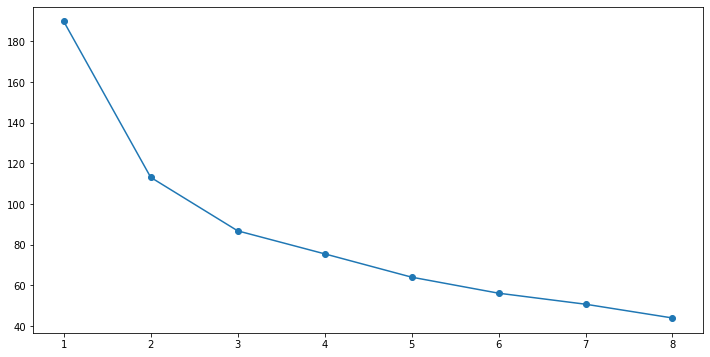

In [34]:
#12 th ques
#Applying Elbow Technique to decide number of clusters
cluster_range = range( 1,9)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(data2)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [36]:
#Applying K Mean by taking 4 clusters
clus = KMeans( n_clusters = 4, random_state = 1 )
clus.fit(data2)

KMeans(n_clusters=4, random_state=1)

In [37]:
#Creating the new Cluster Column in the Train Data Set
data2['Cluster']=clus.labels_
data2.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Cluster
0,-1.322622,1.457172,0.183590,0.501648,-0.209040,3
1,-1.731397,0.089877,-0.496128,-0.355382,0.642819,1
2,0.204940,-1.655524,0.505838,-0.947957,-0.007803,2
3,0.899651,0.787151,-0.919904,-0.627663,0.061843,0
4,2.400747,-0.316567,-0.448018,-0.254252,-0.154793,0
5,-0.494158,0.253394,1.824682,-0.571488,-0.319074,3
6,0.788081,-1.062491,0.529980,0.729362,0.801254,2
7,-1.985708,-0.771405,-0.553717,0.407388,-0.137061,1
8,0.770354,-1.387048,1.384480,0.647028,-0.257167,2
9,-0.382412,0.679496,1.629315,0.562929,0.303017,3


In [41]:
#Q13
#Apply Support Vector classification 
from sklearn.svm import SVC
svc=SVC(C=0.1)
svc.fit(new_data,Y_train)
prediction=svc.predict(data2)
prediction

array(['B', 'B', 'NB', 'NB', 'NB', 'B', 'NB', 'B', 'NB', 'B', 'B', 'B',
       'NB', 'NB', 'NB', 'B', 'NB', 'B', 'NB', 'B', 'B', 'B', 'NB', 'NB',
       'B', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB',
       'NB', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'B', 'B', 'NB',
       'B', 'NB', 'B'], dtype=object)

In [43]:
#Q14
#Checking the Accuracy Score of Training and Testing data
print("Test Data Accuracy Score : ",accuracy_score(Y_test,prediction))
print("Train Data Accuracy Score : ",accuracy_score(Y_train,svc.predict(new_data)))

Test Data Accuracy Score :  0.92
Train Data Accuracy Score :  0.99


#Applying SVC for the original data on which PCA is not applied
 

In [44]:
from sklearn.svm import SVC
svc=SVC(C=0.1)
svc.fit(X_train,Y_train)
pred=svc.predict(X_test)
pred

array(['B', 'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'B',
       'NB', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'B', 'B', 'B', 'NB', 'NB',
       'B', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB',
       'NB', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'NB', 'B',
       'NB', 'B', 'NB', 'B'], dtype=object)

In [45]:
#Checking the Accuracy Score of Training and Testing data
print("Test Data Accuracy Score : ",accuracy_score(Y_test,pred))
print("Train Data Accuracy Score : ",accuracy_score(Y_train,svc.predict(X_train)))

Test Data Accuracy Score :  1.0
Train Data Accuracy Score :  0.995


In [46]:
print("Confusion Matrix for PCA Applied Test Data")
print(confusion_matrix(Y_test,prediction))

Confusion Matrix for PCA Applied Test Data
[[16  0]
 [ 4 30]]


In [48]:
print("Confusion Matrix for PCA Applied Train Data")
print(confusion_matrix(Y_train,svc.predict(new_data)))

Confusion Matrix for PCA Applied Train Data
[[  0  91]
 [  0 109]]


In [49]:
print("Confusion Matrix for Original Test Data")
print(confusion_matrix(Y_test,pred))

Confusion Matrix for Original Test Data
[[16  0]
 [ 0 34]]


In [50]:
print("Confusion Matrix for Original Train Data")
print(confusion_matrix(Y_train,svc.predict(X_train)))

Confusion Matrix for Original Train Data
[[ 90   1]
 [  0 109]]


In [51]:
#SVC accuracy scores are better than others. 